In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial'],  # Fallback to Arial if Helvetica not found
    'mathtext.fontset': 'custom',  # For consistent math rendering
    'mathtext.rm': 'Helvetica',
    'mathtext.it': 'Helvetica:italic',
    'mathtext.bf': 'Helvetica:bold',
    'font.size': 10,  # Standard size for journal publications
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

In [11]:
import os

# current directory
dir_nb = notebook_dir = os.getcwd()
# directory containing python scripts
dir_py = os.path.abspath(os.path.join(dir_nb, "..", "python"))
# directory to save plots
dir_pl = os.path.abspath(os.path.join(dir_nb, "..", "plots"))

os.chdir(dir_py)

In [12]:
from utils_pL import *
from utils_kint import calculate_kint

In [13]:
seq = 'AAAAA'
deut = np.linspace(0,1,101)
temp = 298

In [14]:
# example 1 - fixed pH_read

pH_read = 7

df1 = pd.DataFrame(columns=[
    'x', 'pH_read', 'pL', 'pKx', 'fOL', 'kforw', 'kback', 'kint'
    ])

for _,x in enumerate(deut):
    acidity = get_effective_acidity(T=temp, x=x, pH_read=pH_read)
    frac_OL = get_ions_isotopic_abundance(x)['frac_OL']
    ki = calculate_kint(seq=seq, T=temp, x=x, pH_read=pH_read, ref='PDLA').loc[3]
    ki['kint'] = ki['kforw'] + ki['kback']
    df1.loc[_] = [x, pH_read, acidity['pL'], acidity['pKx'], frac_OL, ki['kforw'], ki['kback'], ki['kint']]

df1

,x,pH_read,pL,pKx,fOL,kforw,kback,kint
0,0.00,7.0,7.000000,14.004573,0.000000,0.000000,26.918534,26.918534
1,0.01,7.0,7.003642,14.011860,0.004725,0.321320,26.458963,26.780283
2,0.02,7.0,7.007290,14.019158,0.009501,0.638048,26.004564,26.642612
3,0.03,7.0,7.010944,14.026467,0.014328,0.950233,25.555277,26.505510
4,0.04,7.0,7.014603,14.033788,0.019207,1.257921,25.111043,26.368964
...,...,...,...,...,...,...,...,...
96,0.96,7.0,7.409544,14.823928,0.918567,14.968412,0.518758,15.487169
97,0.97,7.0,7.414831,14.834506,0.938259,15.002742,0.385940,15.388683
98,0.98,7.0,7.420148,14.845143,0.958385,15.035645,0.255227,15.290872
99,0.99,7.0,7.425494,14.855838,0.978961,15.067166,0.126589,15.193755


In [15]:
# example 2 - fixed pL (acid activity)

pL = 7.43

df2 = pd.DataFrame(columns=[
    'x', 'pH_read', 'pL', 'pKx', 'fOL', 'kforw', 'kback', 'kint'
    ])

for _,x in enumerate(deut):
    pH_read = get_pH_read_from_pL(temp, x, pL)
    acidity = get_effective_acidity(T=temp, x=x, pH_read=pH_read)
    frac_OL = get_ions_isotopic_abundance(x)['frac_OL']
    ki = calculate_kint(seq=seq, T=temp, x=x, pH_read=pH_read, ref='PDLA').loc[3]
    ki['kint'] = ki['kforw'] + ki['kback']
    df2.loc[_] = [x, pH_read, acidity['pL'], acidity['pKx'], frac_OL, ki['kforw'], ki['kback'], ki['kint']]

df2

,x,pH_read,pL,pKx,fOL,kforw,kback,kint
0,0.00,7.430000,7.43,14.004573,0.000000,0.000000,72.452172,72.452172
1,0.01,7.426136,7.43,14.011860,0.004725,0.857621,70.620438,71.478059
2,0.02,7.422270,7.43,14.019158,0.009501,1.688742,68.827085,70.515827
3,0.03,7.418402,7.43,14.026467,0.014328,2.493943,67.071342,69.565285
4,0.04,7.414532,7.43,14.033788,0.019207,3.273789,65.352454,68.626243
...,...,...,...,...,...,...,...,...
96,0.96,7.019325,7.43,14.823928,0.918567,15.690317,0.543777,16.234093
97,0.97,7.014320,7.43,14.834506,0.938259,15.536003,0.399658,15.935661
98,0.98,7.009294,7.43,14.845143,0.958385,15.380634,0.261083,15.641717
99,0.99,7.004248,7.43,14.855838,0.978961,15.224317,0.127909,15.352227


In [16]:
# example 3 - constant pOL (base activity)

def get_ref_pOL(T, x, pH_read):
    acidity = get_effective_acidity(T, x, pH_read)
    return acidity['pKx'] - acidity['pL']

pOL = get_ref_pOL(T=temp, x=1, pH_read=7) # pOL = 7.43

df3 = pd.DataFrame(columns=[
    'x', 'pH_read', 'pL', 'pKx', 'fOL', 'kforw', 'kback', 'kint'
    ])

for _,x in enumerate(deut):
    pKx = get_effective_acidity(T=temp, x=x, pH_read=0)['pKx']
    pL = pKx - pOL
    pH_read = get_pH_read_from_pL(temp, x, pL)
    frac_OL = get_ions_isotopic_abundance(x)['frac_OL']
    ki = calculate_kint(seq=seq, T=temp, x=x, pH_read=pH_read, ref='PDLA').loc[3]
    ki['kint'] = ki['kforw'] + ki['kback']
    df3.loc[_] = [x, pH_read, pL, pKx, frac_OL, ki['kforw'], ki['kback'], ki['kint']]

df3

,x,pH_read,pL,pKx,fOL,kforw,kback,kint
0,0.00,6.568849,6.568849,14.004573,0.000000,0.000000,9.974719,9.974719
1,0.01,6.572716,6.576136,14.011860,0.004725,0.120069,9.887053,10.007123
2,0.02,6.576585,6.583434,14.019158,0.009501,0.240435,9.799272,10.039707
3,0.03,6.580456,6.590744,14.026467,0.014328,0.361102,9.711372,10.072474
4,0.04,6.584329,6.598065,14.033788,0.019207,0.482076,9.623353,10.105428
...,...,...,...,...,...,...,...,...
96,0.96,6.979840,7.388205,14.823928,0.918567,14.250711,0.493884,14.744595
97,0.97,6.984849,7.398783,14.834506,0.938259,14.458467,0.371939,14.830406
98,0.98,6.989879,7.409419,14.845143,0.958385,14.668768,0.248999,14.917767
99,0.99,6.994929,7.420115,14.855838,0.978961,14.881699,0.125031,15.006730


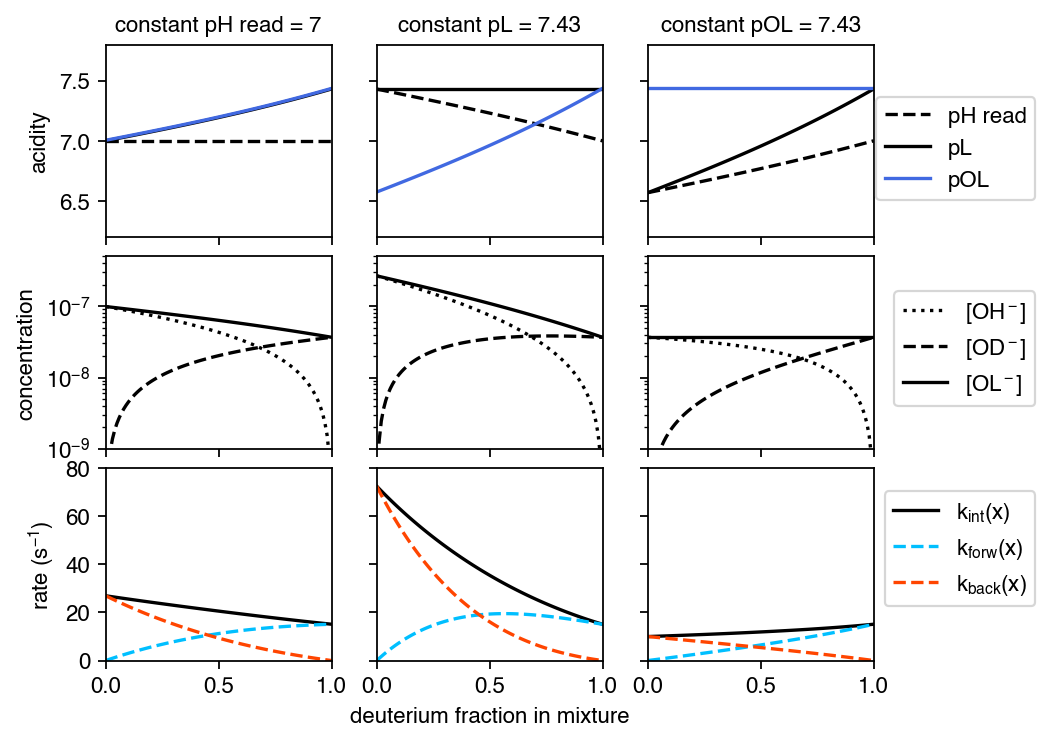

In [18]:
# plot all

# Create the subplot grid with shared x-axis
fig, axes = plt.subplots(3, 3, figsize=(12,5), dpi=160, sharex='all', sharey='row')

# Col1
axes[0,0].plot(df1['x'], df1['pH_read'], c='k', linestyle='--', label="pH read")
axes[0,0].plot(df1['x'], df1['pL'], c='k',  label="pL")
axes[0,0].plot(df1['x'], df1['pKx']-df1['pL'], c='royalblue',  label="pOL")
#axes[0,0].plot(df1['x'], df1['pKx'], c='red',  label=r"p$K_\text{w,mix}$")
axes[0,0].set_title('constant pH read = 7')
axes[0,0].set_ylim(6.2,7.8)
axes[0,0].set_ylabel('acidity')

axes[1,0].plot(df1['x'], 10**(-(df1['pKx']-df1['pL']))*(1-df3['fOL']), c='k', linestyle=':', label=r"[$\text{OH}^-$]")
axes[1,0].plot(df1['x'], 10**(-(df1['pKx']-df1['pL']))*df3['fOL'], c='k', linestyle='--', label=r"[$\text{OD}^-$]")
axes[1,0].plot(df1['x'], 10**(-(df1['pKx']-df1['pL'])), c='k', label=r"[$\text{OL}^-$]")
#axes[1,0].set_xlabel('deuterium fraction in mixture')
axes[1,0].set_yscale('log')
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(10**(-9), 10**(-6.3))
axes[1,0].set_ylabel('concentration')

axes[2,0].plot(df1['x'], df1['kint'], c='k', label=r"$k_\text{int}(x)$")
axes[2,0].plot(df1['x'], df1['kforw'], c='deepskyblue', linestyle='--', label=r"$k_\text{forw}(x)$")
axes[2,0].plot(df1['x'], df1['kback'], c='orangered', linestyle='--', label=r"$k_\text{back}(x)$")
#axes[1,0].set_xlabel('deuterium fraction in mixture')
axes[2,0].set_xlim(0, 1)
axes[2,0].set_ylim(0,80)
axes[2,0].set_ylabel(r'rate (s$^{-1}$)')
#axes[1,0].grid(alpha=0.1)

# Col2

axes[0,1].plot(df2['x'], df2['pH_read'], c='k', linestyle='--', label="pH read")
axes[0,1].plot(df2['x'], df2['pL'], c='k',  label="pL")
axes[0,1].plot(df2['x'], df2['pKx']-df2['pL'], c='royalblue',  label="pOL")
#axes[0,1].plot(df2['x'], df2['pKx'], c='red',  label=r"p$K_\text{w,mix}$")
axes[0,1].set_title('constant pL = 7.43')

axes[1,1].plot(df2['x'], 10**(-(df2['pKx']-df2['pL']))*(1-df2['fOL']), c='k', linestyle=':', label=r"[$\text{OH}^-$]")
axes[1,1].plot(df2['x'], 10**(-(df2['pKx']-df2['pL']))*df2['fOL'], c='k', linestyle='--', label=r"[$\text{OD}^-$]")
axes[1,1].plot(df2['x'], 10**(-(df2['pKx']-df2['pL'])), c='k', label=r"[$\text{OL}^-$]")

axes[2,1].plot(df2['x'], df2['kint'], c='k', label=r"$k_\text{int}(x)$")
axes[2,1].plot(df2['x'], df2['kforw'], c='deepskyblue', linestyle='--', label=r"$k_\text{forw}(x)$")
axes[2,1].plot(df2['x'], df2['kback'], c='orangered', linestyle='--', label=r"$k_\text{back}(x)$")
axes[2,1].set_xlabel('deuterium fraction in mixture')

# Col3

axes[0,2].plot(df3['x'], df3['pH_read'], c='k', linestyle='--', label="pH read")
axes[0,2].plot(df3['x'], df3['pL'], c='k',  label="pL")
axes[0,2].plot(df3['x'], df3['pKx']-df3['pL'], c='royalblue',  label="pOL")
#axes[0,2].plot(df3['x'], df3['pKx'], c='red',  label=r"p$K_\text{w,mix}$")
axes[0,2].set_title('constant pOL = 7.43')

axes[1,2].plot(df3['x'], 10**(-(df3['pKx']-df3['pL']))*(1-df3['fOL']), c='k', linestyle=':', label=r"[$\text{OH}^-$]")
axes[1,2].plot(df3['x'], 10**(-(df3['pKx']-df3['pL']))*df3['fOL'], c='k', linestyle='--', label=r"[$\text{OD}^-$]")
axes[1,2].plot(df3['x'], 10**(-(df3['pKx']-df3['pL'])), c='k', label=r"[$\text{OL}^-$]")
#axes[1,2].set_xlabel('deuterium fraction in mixture')

axes[2,2].plot(df3['x'], df3['kint'], c='k', label=r"$k_\text{int}(x)$")
axes[2,2].plot(df3['x'], df3['kforw'], c='deepskyblue', linestyle='--', label=r"$k_\text{forw}(x)$")
axes[2,2].plot(df3['x'], df3['kback'], c='orangered', linestyle='--', label=r"$k_\text{back}(x)$")

# Create combined legend
handles1, labels1 = axes[0, 0].get_legend_handles_labels()
handles2, labels2 = axes[1, 0].get_legend_handles_labels()
handles3, labels3 = axes[2, 0].get_legend_handles_labels()


# Adjust spacing between subplots
fig.legend(handles1, labels1, loc='center right', bbox_to_anchor=(.99, 0.75))
fig.legend(handles2, labels2, loc='center right', bbox_to_anchor=(.99, 0.5))
fig.legend(handles3, labels3, loc='center right', bbox_to_anchor=(.99, 0.25))
plt.subplots_adjust(hspace=0.1, wspace=0.2, left=0.5)  # Reduce space between subplots

plt.savefig(dir_pl+"/eie.png")
plt.show()